<a href="https://colab.research.google.com/github/danipel/Compu-blanda/blob/main/fuzzy_control_server_room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación control difuso sistema de temperatura y humedad (servers room)

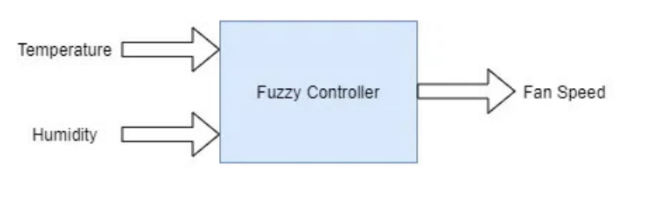

## Paso 1: Fuzzificación

Se definen los conjuntos difusos para cada variable:

### Temperatura
- Baja: 0 - 20 °C
- Media: 10 - 30 °C
- Alta: >25 °C

Con las funciones:
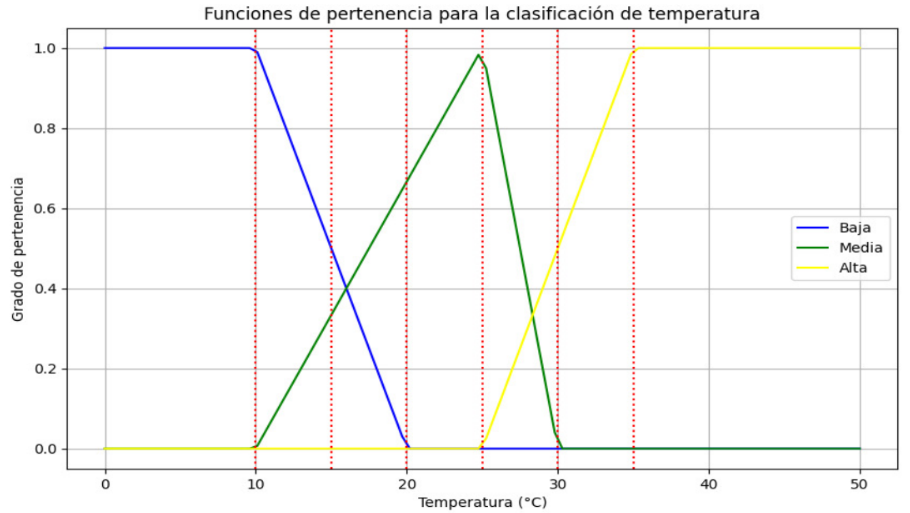

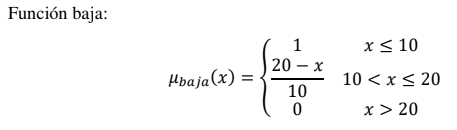

Valor ejemplo:  0.5


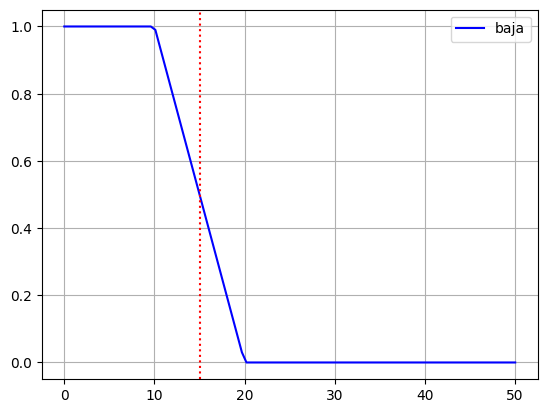

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN TEMPERATURA BAJA
#------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt


def baja(x):
  return (x<=10)*1 + ((10<x)&(x<=20))*(20-x)/10 + (x>20)*0

#Ejemplo
ejm = baja(15)
print("Valor ejemplo: ", ejm)

# Graficar
x = np.linspace(0,50,100)
low = baja(x)
plt.plot(x, low, label="baja", color="blue")
plt.axvline(x=15, color="red", linestyle=":") #ejem
plt.legend()
plt.grid()
plt.show()

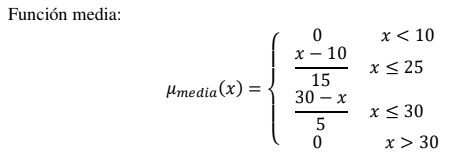

Valor ejemplo:  0.3333333333333333


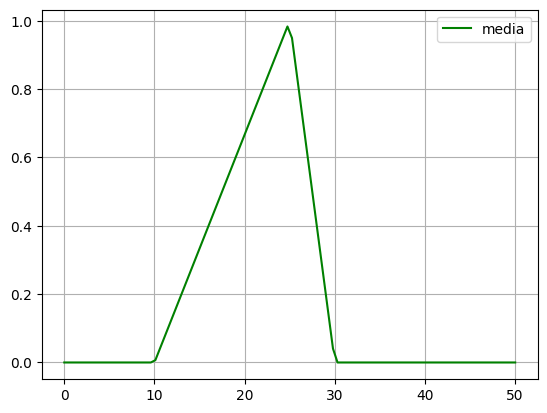

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN TEMPERATURA MEDIA
#-------------------------------------------------------------------------------
def media(x):
  return (x<10)*0 + ((x>=10)&(x<=25))*(x-10)/15 + ((x>25)&(x<=30))*(30-x)/5 + (x>30)*0

#Ejemplo
ejm = media(15)
print("Valor ejemplo: ", ejm)

# Graficar
medium = media(x)
plt.plot(x,medium, label="media", color="green")
plt.legend()
plt.grid()
plt.show()

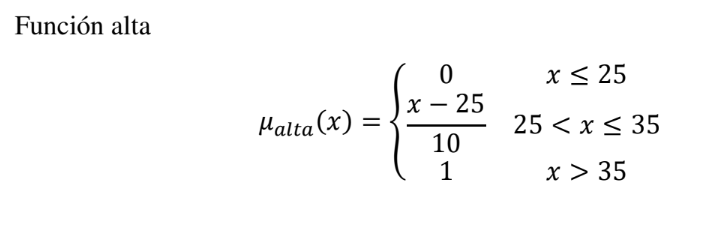

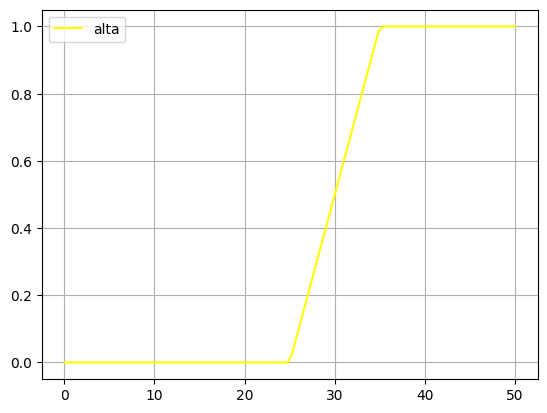

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN TEMPERATURA ALTA
#-------------------------------------------------------------------------------
def alta(x):
  return (x<=25)*0 + ((x>25)&(x<=35))*(x-25)/10 + (x>35)*1

# Graficar
high = alta(x)
plt.plot(x, high, label="alta", color="yellow")
plt.legend()
plt.grid()
plt.show()

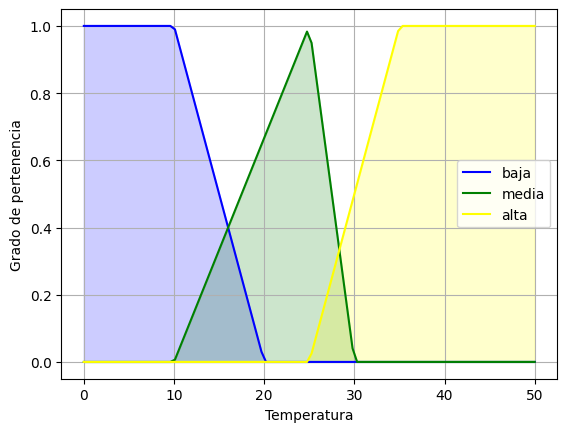

In [ ]:
#-------------------------------------------------------------------------------
# LOS TRES CONJUNTOS
#-------------------------------------------------------------------------------
plt.plot(x, low, label="baja", color="blue")
plt.fill_between(x, low, color="blue", alpha=0.2)
plt.plot(x,medium, label="media", color="green")
plt.fill_between(x, medium, color="green", alpha=0.2)
plt.plot(x, high, label="alta", color="yellow")
plt.fill_between(x, high, color="yellow", alpha=0.2)
plt.xlabel('Temperatura')              # Esto no me dio no sé pq
plt.ylabel("Grado de pertenencia")
xs = np.array([15, 20, 25, 30, 35])
plt.legend()
plt.grid()
plt.show()

### Humedad
 - Seca: 0-60 %
 - Normal: 30 - 90 %
 - Mojada: >60 %

Con las funciones:
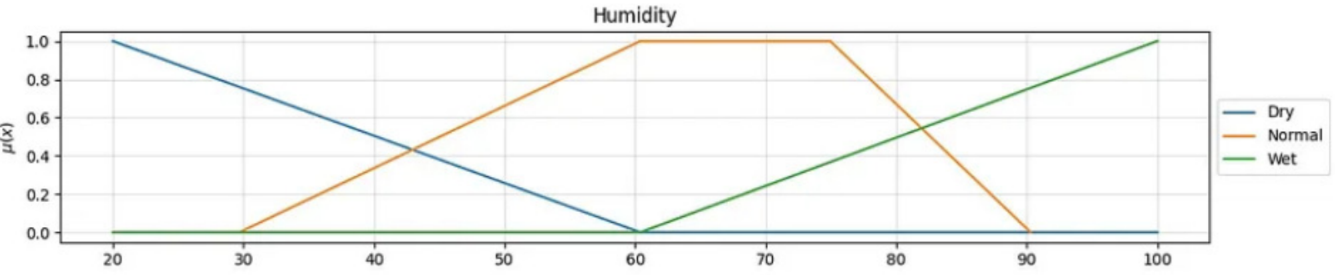

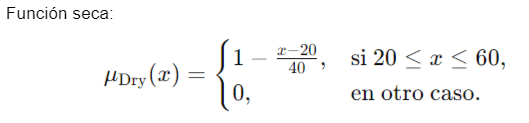

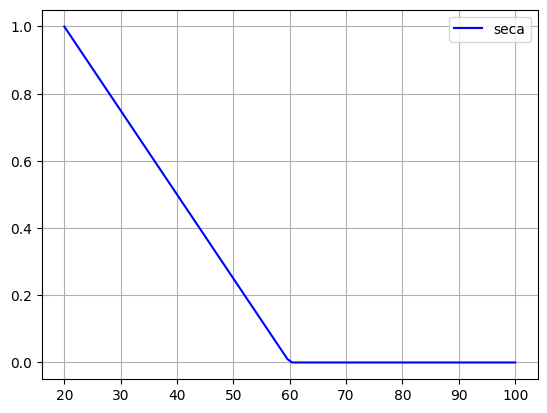

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN HUMEDAD SECA
#-------------------------------------------------------------------------------

def seca(x):
  return ((x>=20)&(x<=60))* (1-(x-20)/40) + (x>60)*0

# Graficar
x = np.linspace(20,100,100)
dry = seca(x)
plt.plot(x, dry, label="seca", color="blue")
plt.legend()
plt.grid()
plt.show()

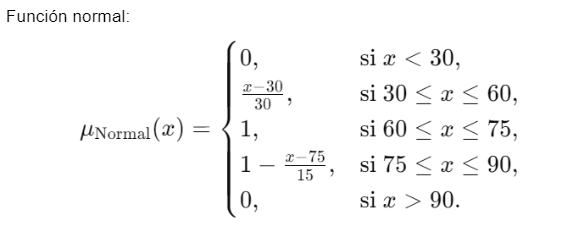

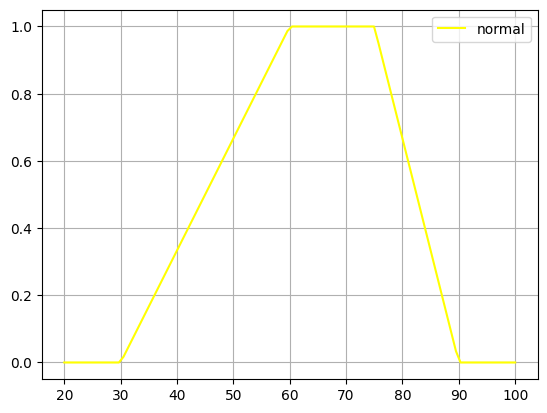

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN HUMEDAD NORMALITO
#-------------------------------------------------------------------------------
def normalito(x):
  return ((x>=30)&(x<60))* (x-30)/30 + ((x>=60)&(x<=75))*1 + ((x>75)&(x<=90))* (1-(x-75)/15) + (x>90)*0

# Graficar
x = np.linspace(20,100,100)
normal_h = normalito(x)
plt.plot(x, normal_h, label="normal", color="yellow")
plt.legend()
plt.grid()
plt.show()

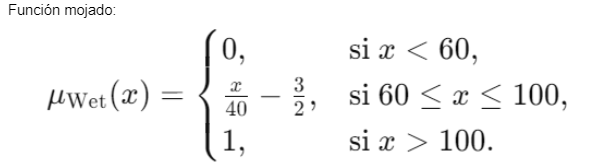![image.png]()

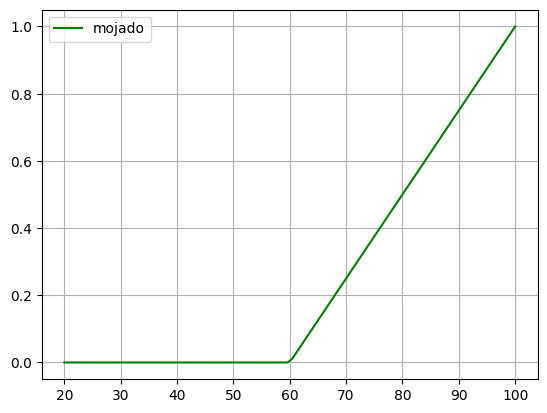

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN HUMEDAD MOJADO
#-------------------------------------------------------------------------------
def mojado(x):
  return (x<60)*0 + ((x>=60)&(x<=100))* (x/40 - 3/2) + (x>100)*1

# Graficar
x = np.linspace(20,100,100)
wet = mojado(x)
plt.plot(x, wet, label="mojado", color="green")
plt.legend()
plt.grid()
plt.show()

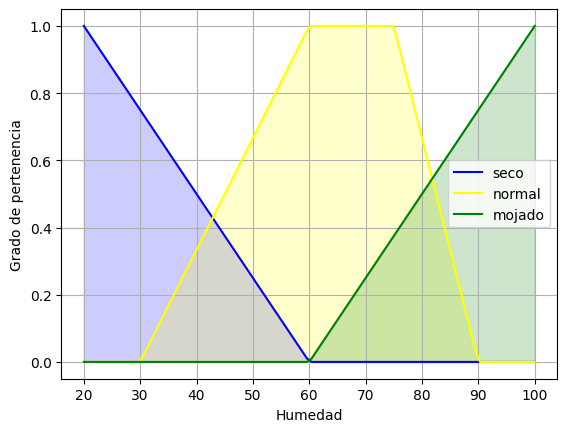

In [ ]:
#-------------------------------------------------------------------------------
# LOS TRES CONJUNTOS
#-------------------------------------------------------------------------------
plt.plot(x, dry, label="seco", color="blue")
plt.fill_between(x, dry, color="blue", alpha=0.2)
plt.plot(x,normal_h, label="normal", color="yellow")
plt.fill_between(x, normal_h, color="yellow", alpha=0.2)
plt.plot(x, wet, label="mojado", color="green")
plt.fill_between(x, wet, color="green", alpha=0.2)
plt.xlabel('Humedad')
plt.ylabel("Grado de pertenencia")
plt.legend()
plt.grid()
plt.show()

### Velocidad del ventilador
- Lenta: 0 - 50 %
- Moderada: 10 - 90 %
- Rápida: >50 %

Con las funciones:
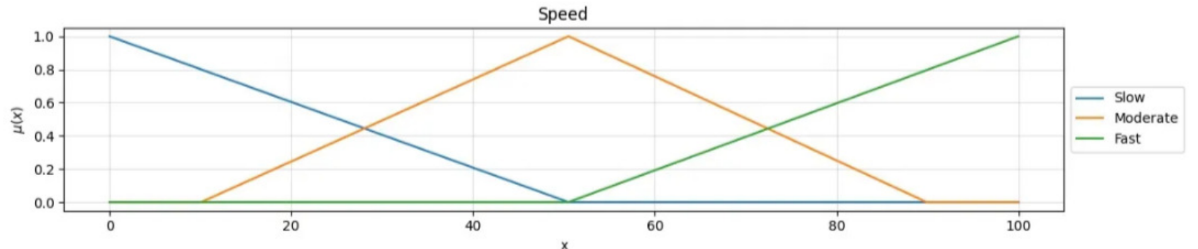

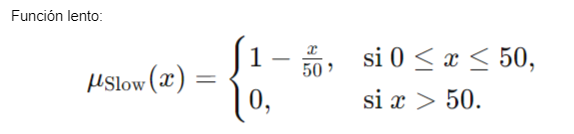

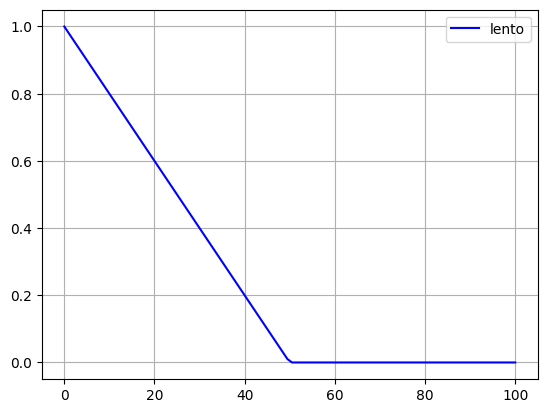

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN VELOCIDAD LENTA
#-------------------------------------------------------------------------------
def lento(x):
  return ((x>=0)&(x<=50))* (1 - x/50) + (x>50)*0

# Graficar
x = np.linspace(0,100,100)
slow = lento(x)
plt.plot(x, slow, label="lento", color="blue")
plt.legend()
plt.grid()
plt.show()

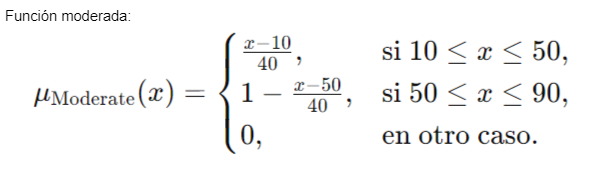

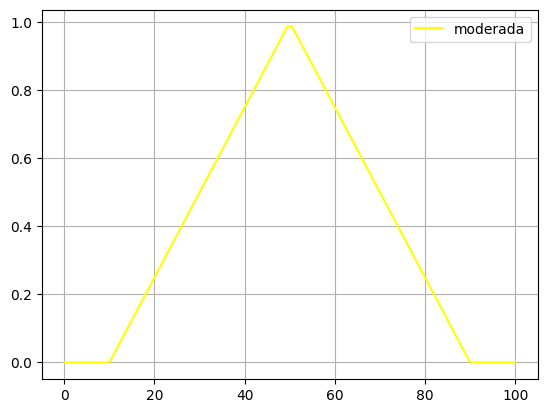

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN VELOCIDAD MODERADA
#-------------------------------------------------------------------------------
def moderada(x):
  return ((x>=10)&(x<50))* (x-10)/40 + ((x>=50)&(x<=90))* (1-(x-50)/40)

# Graficar
moderate = moderada(x)
plt.plot(x, moderate, label="moderada", color="yellow")
plt.legend()
plt.grid()
plt.show()

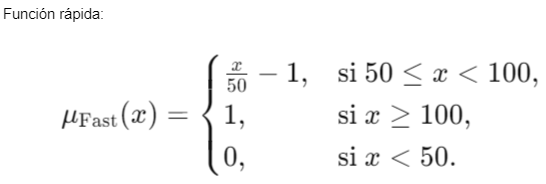

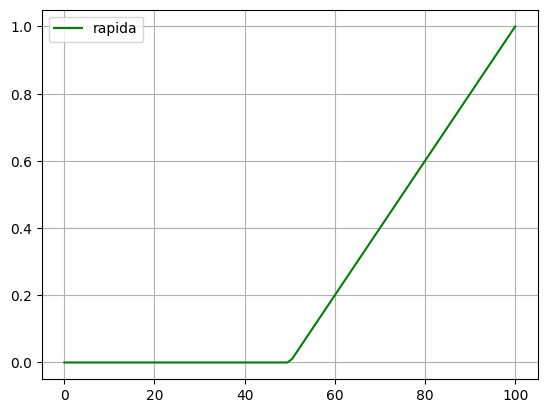

In [ ]:
#-------------------------------------------------------------------------------
# FUNCIÓN VELOCIDAD RÁPIDA
#-------------------------------------------------------------------------------
def rapida(x):
  return ((x>=50)&(x<100))* (x/50 - 1) + (x>=100)*1

# Graficar
fast = rapida(x)
plt.plot(x, fast, label="rapida", color="green")
plt.legend()
plt.grid()
plt.show()

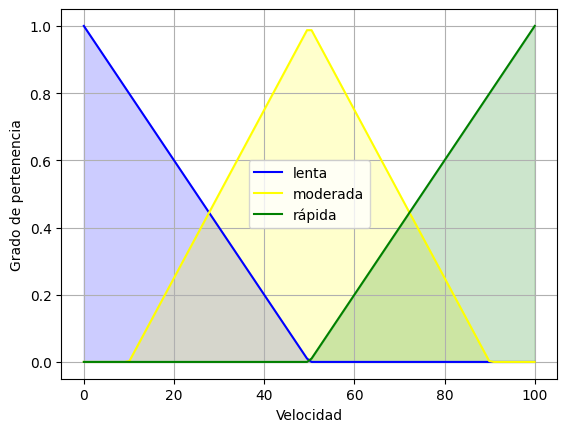

In [ ]:
#-------------------------------------------------------------------------------
# LOS TRES CONJUNTOS
#-------------------------------------------------------------------------------
plt.plot(x, slow, label="lenta", color="blue")
plt.fill_between(x, slow, color="blue", alpha=0.2)
plt.plot(x,moderate, label="moderada", color="yellow")
plt.fill_between(x, moderate, color="yellow", alpha=0.2)
plt.plot(x, fast, label="rápida", color="green")
plt.fill_between(x, fast, color="green", alpha=0.2)
plt.xlabel('Velocidad')
plt.ylabel("Grado de pertenencia")
plt.legend()
plt.grid()
plt.show()

## Paso 2: Definición de las reglas

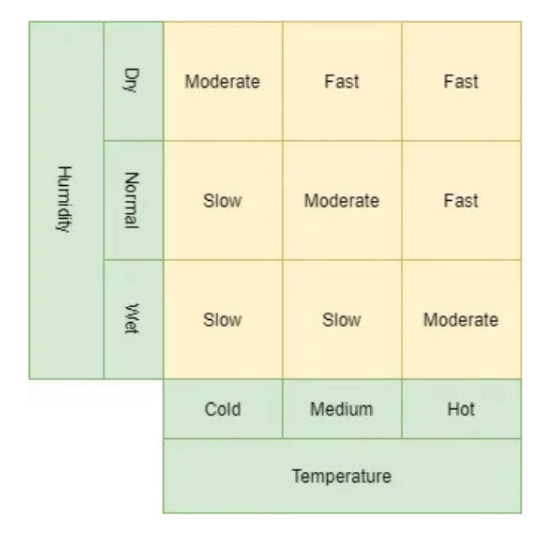

In [ ]:
# Reglas difusas
def fuzzy_rules(humidity, temperature):
  # Evaluar las funciones de pertenencia
  dry = seca(humidity)
  normal = normalito(humidity)
  wet = mojado(humidity)
  cold = baja(temperature)
  medium = media(temperature)
  hot = alta(temperature)

  # Aplicar las reglas
  rules = {
    "slow": max(          # Recordar: max: or difuso
      min(normal, cold),  # Recordar: min: and difuso
      min(wet, cold),
      min(wet, medium)
    ),
    "moderate": max(
      min(dry, cold),
      min(dry, medium),
      min(wet, hot)
    ),
    "fast": max(
      min(dry, medium),
      min(dry, hot),
      min(normal, hot)
    )
  }
  return rules

## Paso 3: Defuzzificación

In [ ]:
# Defuzzificación (Método del centroide)
def defuzzify(rules):
  x_values = np.linspace(0, 100, 500)
  slow_values = np.array([lento(x) * rules["slow"] for x in x_values])
  moderate_values = np.array([moderada(x) * rules["moderate"] for x in x_values])
  fast_values = np.array([rapida(x) * rules["fast"] for x in x_values])

  # Combinar las salidas
  aggregated = np.maximum.reduce([slow_values, moderate_values, fast_values])

  # Centroide
  numerator = np.sum(aggregated * x_values)
  denominator = np.sum(aggregated)
  if denominator == 0:
    return 0  # Si no hay activación
  return numerator / denominator

## Ejemplo:

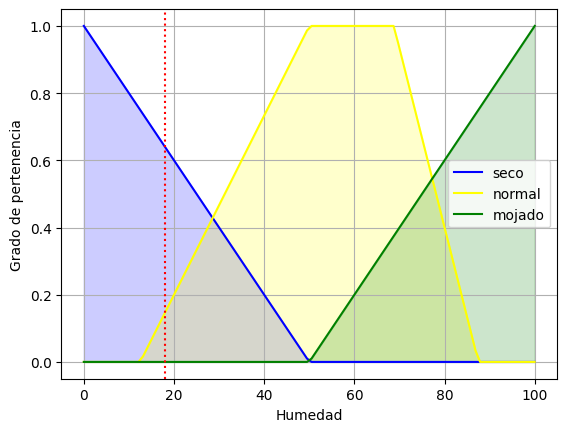

Valor aprox:  0.3


In [ ]:
# Valor de ejemplo de HUMEDAD
humidity_input = 18

# Graficar
plt.plot(x, dry, label="seco", color="blue")
plt.fill_between(x, dry, color="blue", alpha=0.2)
plt.plot(x,normal_h, label="normal", color="yellow")
plt.fill_between(x, normal_h, color="yellow", alpha=0.2)
plt.plot(x, wet, label="mojado", color="green")
plt.fill_between(x, wet, color="green", alpha=0.2)
plt.axvline(x=humidity_input, color="red", linestyle=":")
plt.xlabel('Humedad')
plt.ylabel("Grado de pertenencia")
plt.legend()
plt.grid()
plt.show()

print("Valor aprox: ", 0.3)

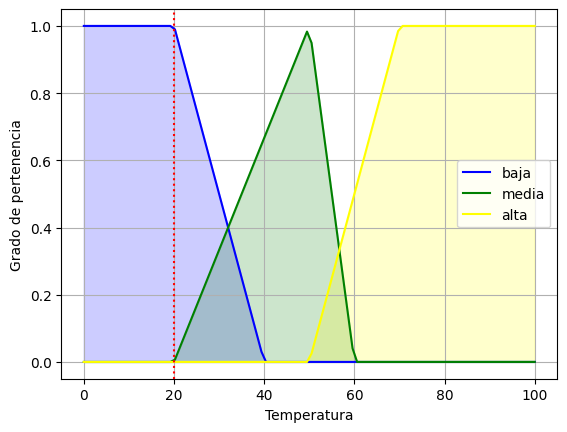

Valor aprox:  0.82


In [ ]:
# Valor ejemplo de TEMPERATURA
temperature_input = 20

#Graficar
plt.plot(x, low, label="baja", color="blue")
plt.fill_between(x, low, color="blue", alpha=0.2)
plt.plot(x,medium, label="media", color="green")
plt.fill_between(x, medium, color="green", alpha=0.2)
plt.plot(x, high, label="alta", color="yellow")
plt.fill_between(x, high, color="yellow", alpha=0.2)
plt.axvline(x=temperature_input, color="red", linestyle=":")
plt.xlabel('Temperatura')
plt.ylabel("Grado de pertenencia")
plt.legend()
plt.grid()
plt.show()

print("Valor aprox: ", 0.82)

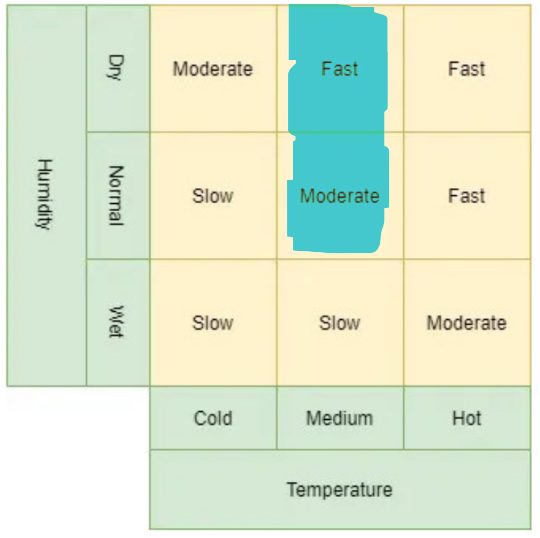

In [ ]:
# Evaluar reglas y defuzzificar
rules_output = fuzzy_rules(humidity_input, temperature_input)
print(rules_output)
po = fuzzy_rules(18,20)
print(po)
speed_output = defuzzify(rules_output)
print("Velocidad: ", speed_output)

{'slow': 0.0, 'moderate': 0.0, 'fast': 0.0}
{'slow': 0.0, 'moderate': 0.0, 'fast': 0.0}
Velocidad:  0


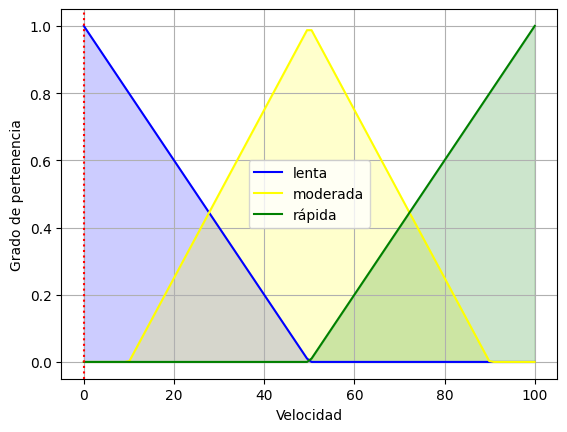

In [ ]:
plt.plot(x, slow, label="lenta", color="blue")
plt.fill_between(x, slow, color="blue", alpha=0.2)
plt.plot(x,moderate, label="moderada", color="yellow")
plt.fill_between(x, moderate, color="yellow", alpha=0.2)
plt.plot(x, fast, label="rápida", color="green")
plt.fill_between(x, fast, color="green", alpha=0.2)
plt.axvline(x=speed_output, color="red", linestyle=":")
plt.xlabel('Velocidad')
plt.ylabel("Grado de pertenencia")
plt.legend()
plt.grid()
plt.show()